# Chapter.4 Single-variate Linear Regression

## Programming Assignment.4-05 Contour Plot of Cost Function

PA 4-05에서는 PA 4-02에서 그려봤던 loss function들의 contour plot들을 평균화하여 cost function의 contour plot의 모습을 살펴봅니다.  
즉, mini-batch를 사용하여 learnable parameter를 학습하는 방법이 gradient vector에 어떤 영향을 미치는지 살펴봅니다.  

주의할 점은 mini-batch size가 커질수록 지금은 gradient descent method가 효율적으로 일어나는 것처럼 보이지만, mini-batch size가 지나치게 커지면 실제 deep learning system에서는 문제가 발생합니다.  
따라서 mini-batch size가 커질 때 contour plot가 변하는 경향성을 집중적으로 살펴보길 바랍니다.

PA 4-05에서는 SVLR을 해결하기 위해 가장 이상적인 contour plot을 만들기 위해 어떤 data sample들이 사용되어야 하는지 중점적으로 다룹니다.  
즉, $\mathcal{L} = \theta_{1}^{2} + \theta_{0}^{2}$와 같이 이상적인 convex function을 만드는 방법을 학습니다.  
이를 위해 PA 4-05는 다음과 같은 단계들로 이루어집니다.

<ul>
    <li> Step.1 get_contours Function </li>
    <li> Step.2 Y-axis Symmety </li>
    <li> Step.3 Diagonal Symmetry </li>
    <li> Step.4 Cost Functions with Normal Distribution </li>
</ul>

먼저 다음의 셀을 실행하여 필요한 library들을 import 해줍니다.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.style.use('seaborn')
np.random.seed(0)

***
## Step.1 get_contours Function

먼저 다음의 셀을 실행하여 get_contours를 정의합니다.  

이 함수는 2개의 axes에 contour plot들을 시각화하며,  
왼쪽의 ax에는 data sample들에 따른 loss function들의 contour plot들을 중첩시켜 그려주고  
오른쪽 ax에는 cost function의 contour plot을 그려줍니다.

그리고 cost function의 contour plot은 cost function의 정의
$$J(\theta_{1}, \theta_{0}) = \frac{1}{n}\sum_{i=1}^{n}\mathcal{L}^{(i)}(\theta_{1}, \theta_{0})$$
에 따라 loss function의 값들을 평균적으로 연산합니다.

이 get_contours 함수의 input은 다음과 같습니다.
- INPUT : x_data, y_data, axes, alpha_loss, alpha_cost  

axes는 2개의 ax를 가지고 있는 axes이고, alpha는 loss function, cost function들의 contour plot들을 각각 지정해줍니다.  
그리고 get_contours는 시각화 함수이기 때문에 return은 없습니다.  
또한 빨간 점선은 Step.3을 위한 보조선입니다.

In [72]:
def get_contours(x_data, y_data, axes, alpha_loss, alpha_cost):
    th1_range = np.linspace(-1, 3, 100)
    th0_range = np.linspace(1, 5, 100)
    Th1, Th0 = np.meshgrid(th1_range, th0_range)

    axes[0].tick_params(axis = 'both', labelsize = 20)
    axes[1].tick_params(axis = 'both', labelsize = 20)
    
    cost = np.zeros(shape = Th1.shape)
    for data_idx, (x,y) in enumerate(zip(x_data, y_data)):
        loss = np.power(y - (Th1*x + Th0), 2)
        cost += loss
        
        levels = np.geomspace(np.min(loss) + 0.01, np.max(loss), 30)
        cmap = cm.get_cmap('Blues_r', lut = len(levels))
        axes[0].contour(Th1, Th0, loss,
                    levels = levels, cmap = cmap,
                    alpha = alpha_loss)
    levels = np.geomspace(np.min(cost) + 0.01, np.max(cost), 30)
    cmap = cm.get_cmap('Blues_r', lut = len(levels))
    axes[1].contour(Th1, Th0, cost,
                   levels = levels, cmap = cmap,
                   alpha = alpha_cost)
    
    test_x = np.linspace(-1,3)
    axes[1].plot(test_x, test_x+2, linestyle = ':', color = 'r')
    axes[1].plot(test_x, -1*test_x+4, linestyle = ':', color = 'r')

다음 셀을 실행하여
$$y = x + 3$$
에서부터 만들어진 2개의 data sample
$$x^{(1)}=-1, x^{(2)} = 1$$
에 대한 loss function들의 contour plot과 cost function의 contour plot을 시각화해보세요.

In [ ]:
x_data = np.array([-1, 1])
y_data = x_data + 3

fig, axes = plt.subplots(1, 2, figsize = (15,7.5))
get_contours(x_data, y_data, axes, 0.3, 0.6)

위의 cost function의 contour plot은 $\theta_{1}, \theta_{0}$의 학습이 $\theta_{1}^{*}, \theta_{0}^{*}$에 direct한 방향으로 일어나는 모습임을 알 수 있습니다.

PA 4-05에서는 이와 최대한 비슷한 contour plot을 만드는 방법을 다룹니다.

***
## Step.2 Y-axis Symmetry

PA 4-02에서 확인할 수 있듯이, data sample에 따라 contour plot의 모습은 달라집니다.  
이때 하나의 기준은 x의 절댓값이 양수인지 음수인지에 따라 다음과 같이 변합니다.
- $x > 0 \Rightarrow (-)$  기울기 
- $x < 0 \Rightarrow (+)$  기울기 

이에 따라 좌우대칭인 cost function의 contour plot을 얻기 위해선 서로 부호는 다르지만 절댓값이 같은 x값들을 사용해야 합니다.

***
**Programming**  
다음의 data sample들
$$( x^{(1)}, x^{(2)} ) = ( -1, 1 )$$
들에 대한 contour plot을 그리고 좌우대칭인지 확인하세요.

- alpha_loss = 0.1
- alpha_cost = 0.5

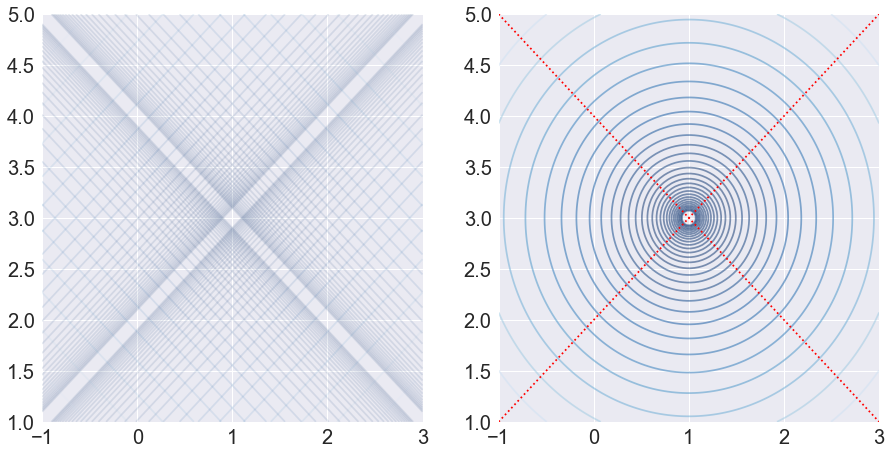

In [74]:
##### Start Your Code(Dataset Preparation) #####
x_data = np.array([-1, 1])
y_data = x_data + 3
##### End Your Code(Dataset Preparation) #####


fig, axes = plt.subplots(1, 2, figsize = (15,7.5))
##### Start Your Code(get_contours Function) #####
get_contours(x_data, y_data, axes, 0.1, 0.5)
##### End Your Code(get_contours Function) #####

***
**Programming**  
이번엔 x의 절댓값이 1보다 큰 경우를 살펴봅니다.  

다음의 data sample들
$$( x^{(1)}, x^{(2)} ) = ( -2, 2 )$$
들에 대한 contour plot을 그리고 좌우대칭인지 확인하세요.

- alpha_loss = 0.1
- alpha_cost = 0.5

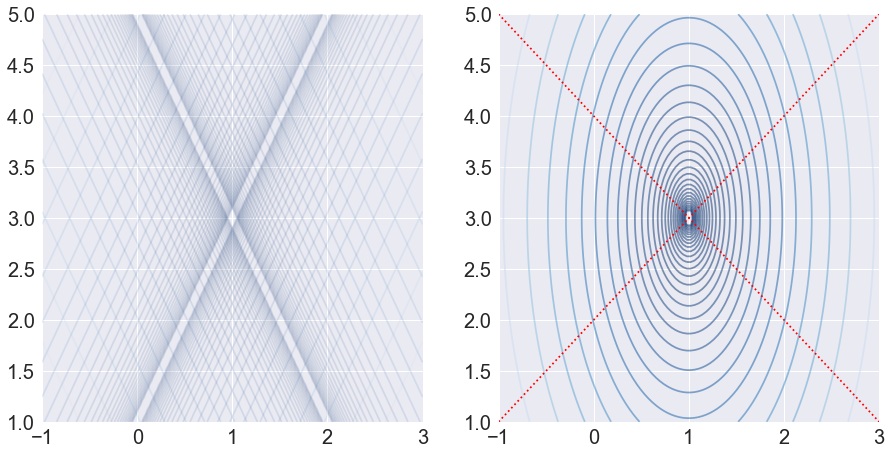

In [75]:
##### Start Your Code(Dataset Preparation) #####
x_data = np.array([-2, 2])
y_data = x_data + 3
##### End Your Code(Dataset Preparation) #####

fig, axes = plt.subplots(1, 2, figsize = (15,7.5))
##### Start Your Code(get_contours Function) #####
get_contours(x_data, y_data, axes, 0.1, 0.5)
##### End Your Code(get_contours Function) #####

***
**Programming**  
이번엔 x의 절댓값이 1보다 작은 경우를 살펴봅니다.  

다음의 data sample들
$$( x^{(1)}, x^{(2)} ) = ( -0.5, 0.5 )$$
들에 대한 contour plot을 그리고 좌우대칭인지 확인하세요.

- alpha_loss = 0.1
- alpha_cost = 0.5

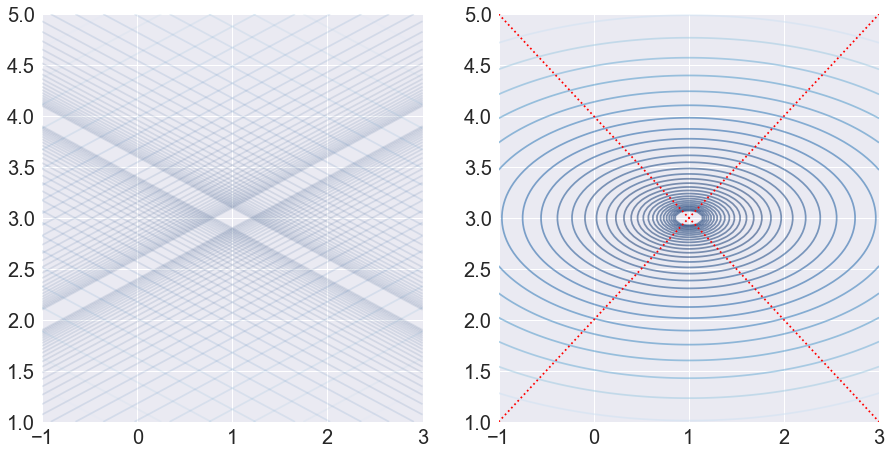

In [76]:
##### Start Your Code(Dataset Preparation) #####
x_data = np.array([-0.5, 0.5])
y_data = x_data + 3
##### End Your Code(Dataset Preparation) #####

fig, axes = plt.subplots(1, 2, figsize = (15,7.5))
##### Start Your Code(get_contours Function) #####
get_contours(x_data, y_data, axes, 0.1, 0.5)
##### End Your Code(get_contours Function) #####

***
**Programming**  
이번엔 좌우대칭성이 깨지는 경우를 살펴 봅니다.

다음의 2가지 경우에서 data sample들에 대한 contour plot을 그리고 좌우대칭인지 확인하세요. 그리고 각각 좌우대칭으로 만들기 위해선 어떤 data sample이 추가되어야 하는지 예측해보고 결과를 확인하세요.
$$( x^{(1)}, x^{(2)} ) = ( 1, 2 )$$
$$( x^{(1)}, x^{(2)} ) = ( -5, -6 )$$

- alpha_loss = 0.1
- alpha_cost = 0.5

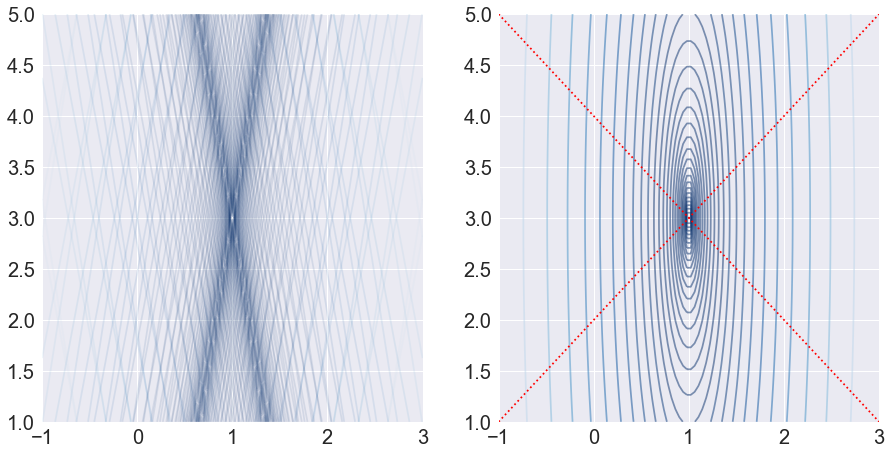

In [77]:
##### Start Your Code(Dataset Preparation) #####
x_data = np.array([-5, -6, 5, 6])
y_data = x_data + 3
##### End Your Code(Dataset Preparation) #####

fig, axes = plt.subplots(1, 2, figsize = (15,7.5))
##### Start Your Code(get_contours Function) #####
get_contours(x_data, y_data, axes, 0.1, 0.5)
##### End Your Code(get_contours Function) #####

***
## Step.3 Diagonal Symmetry

data sample들에 따라 contour plot이 달라지는 기준은 x의 부호 뿐만 아니라,  
x의 절댓값에도 다음과 같이 영향을 받습니다.

- $|x| > 1 \Rightarrow $ 기울기가 무한대 쪽으로 가까워짐
- $|x| < 1 \Rightarrow $ 기울기가 0 쪽으로 가까워짐

이때 loss function의 식
$$ \mathcal{L}(\theta_{1}, \theta_{0}) = (y^{(i)} - (\theta_{1}x^{(i)} + \theta_{0}))^{2} $$
$$=
x^{2} (\theta_{1})^{2} + (\theta_{0})^{2} -2xy\theta_{1}  - 2y\theta_{0} + 2x\theta_{1}\theta_{0} + y^{2}$$
에서 알 수 있듯이 

- $|x| > 1 \Rightarrow $ loss들이 전반적으로 커짐
- $|x| < 1 \Rightarrow $ loss들이 전반적으로 작아짐

따라서 Diagonal Symmetric한 cost function을 만들기 위해선 절댓값이 1보다 큰 x보다 절댓값이 1보다 작은 x가 더 많아야 합니다.  

***
**Programming**  

다음의 data sample들
$$( x^{(1)}, x^{(2)} ) = ( 2, 0.5 )$$
들에 대한 contour plot을 그리고 Diagonal Symmetric한지 확인하세요.

- alpha_loss = 0.1
- alpha_cost = 0.5

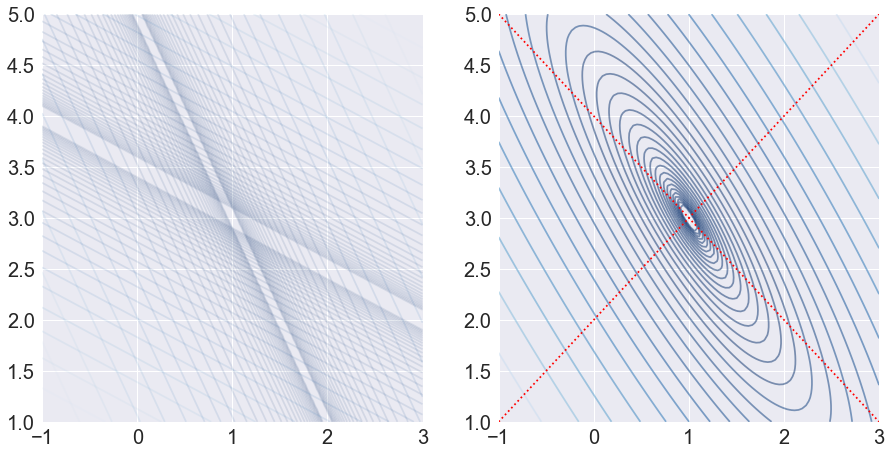

In [79]:
##### Start Your Code(Dataset Preparation) #####
x_data = np.array([2, 0.5])
y_data = x_data + 3
##### End Your Code(Dataset Preparation) #####

fig, axes = plt.subplots(1, 2, figsize = (15,7.5))
##### Start Your Code(get_contours Function) #####
get_contours(x_data, y_data, axes, 0.1, 0.5)
##### End Your Code(get_contours Function) #####

***
**Programming**  

다음의 data sample들
$$( x^{(1)}, x^{(2)}, x^{(3)}, x^{(4)}, x^{(5)} ) = ( 2, 0.5, 0.4, 0.3, 0.2 )$$
들에 대한 contour plot을 그리고 Diagonal Symmetric한지 확인하세요.

- alpha_loss = 0.1
- alpha_cost = 0.5

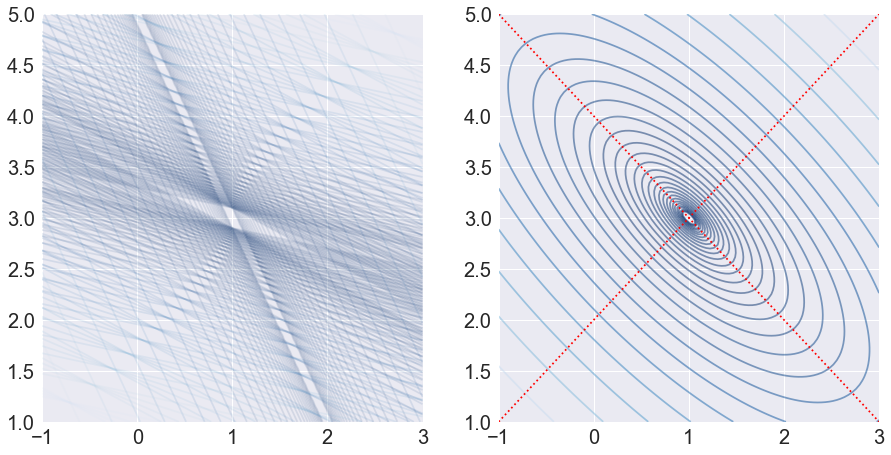

In [89]:
##### Start Your Code(Dataset Preparation) #####
x_data = np.array([2, 0.5, 0.4, 0.3, 0.2])
y_data = x_data + 3
##### End Your Code(Dataset Preparation) #####

fig, axes = plt.subplots(1, 2, figsize = (15,7.5))
##### Start Your Code(get_contours Function) #####
get_contours(x_data, y_data, axes, 0.1, 0.5)
##### End Your Code(get_contours Function) #####

***
**Programming**  

data sample $d^{(i)}$이
$$x^{(1)} =  -5 $$
와 같이 주어졌을 때, diagonal symmetric한 cost funciton을 만들기 위해 어떤 data sample들과 mini-batch를 만들어야하는지 구하세요.

- alpha_loss = 0.05
- alpha_cost = 0.5

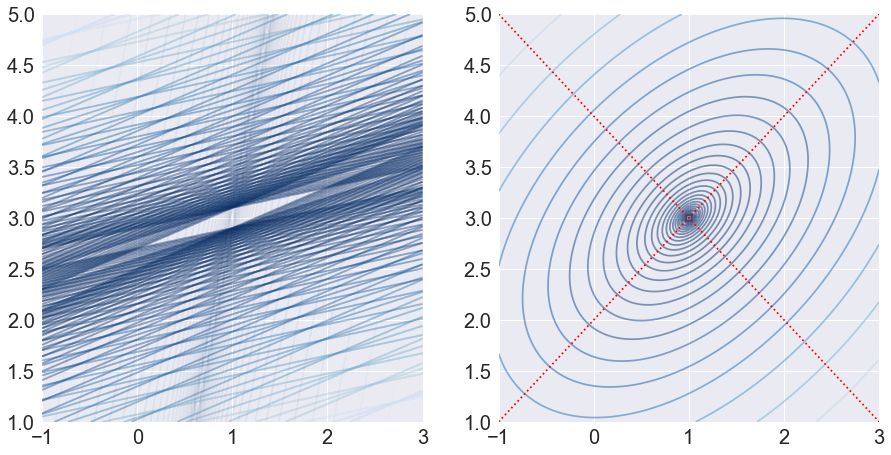

In [98]:
##### Start Your Code(Dataset Preparation) #####
x_data = np.array([-5] + [-0.4, -0.3, -0.2]*10)
y_data = x_data + 3
##### End Your Code(Dataset Preparation) #####

fig, axes = plt.subplots(1, 2, figsize = (15,7.5))
##### Start Your Code(get_contours Function) #####
get_contours(x_data, y_data, axes, 0.05, 0.5)
##### End Your Code(get_contours Function) #####

***
## Step.4 Cost Functions with Normal Distribution

$\mathcal{L}(\theta_{1}, \theta_{0}) = \theta_{1}^{2} + \theta_{0}^{2}$에 가까운, 즉 좌우대칭이면서 대각선을 기준으로도 대칭인 cost function을 만들기 위해서  

- Step.2에서는 부호가 서로 다르고 절댓값이 같은 data sample들이 많을수록,  
- Step.3에서는 x의 절댓값이 1보다 작은 data가 절댓값이 1보다 큰 data보다 일정 비율로 많아야 했습니다.

그리고 강의에서 설명했듯이, 이를 만족하는 이상적인 data distribution은 standard normal distribution입니다.

따라서 Step.4에서는 먼저 standard normal distribution에서 data sample들을 만들고,  
이 standard normal distribution의 특성을 충분히 반영하도록 50개의 data sample을 이용하여 cost function의 contour plot을 그려봅니다.  
그 후, mean과 std을 바꿔가며 data distribution에 따라 cost function이 어떻게 바뀌는지 확인합니다.

***
**Programming**  
x_data를 50개의 sample을 가진 standard normal distribution으로 만들고 cost function을 시각화하세요.  
그리고 $\mathcal{L}(\theta_{1}, \theta_{0}) = \theta_{1}^{2} + \theta_{0}^{2}$과 비슷한지 확인하세요.  

- alpha_loss = 0.01
- alpha_cost = 0.5

(Hint.1) np.random.normal()

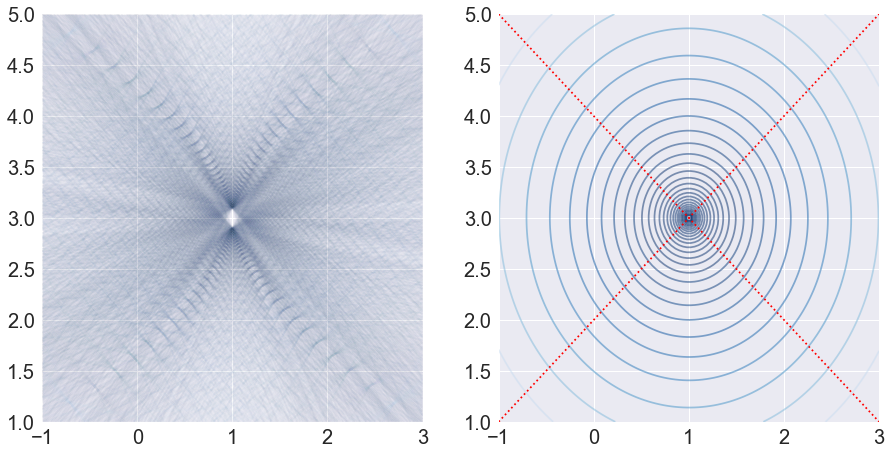

In [101]:
##### Start Your Code(Dataset Preparation) #####
mu, std = 0, 1
n_sample = 50

x_data = np.random.normal(mu, std, n_sample)
y_data = x_data + 3
##### Start Your Code(Dataset Preparation) #####

fig, axes = plt.subplots(1, 2, figsize = (15,7.5))
##### Start Your Code(get_contours Function) #####
get_contours(x_data, y_data, axes, 0.01, 0.5)
##### End Your Code(get_contours Function) #####

***
**Programming**  
다음 조건의 normal distribution에 대해 cost function을 시각화하세요.  
그리고 cost function의 결과가 나오는 이유를 분석하세요.
- n_sample = 50
- mean = 0
- std = 3

- alpha_loss = 0.01
- alpha_cost = 0.5

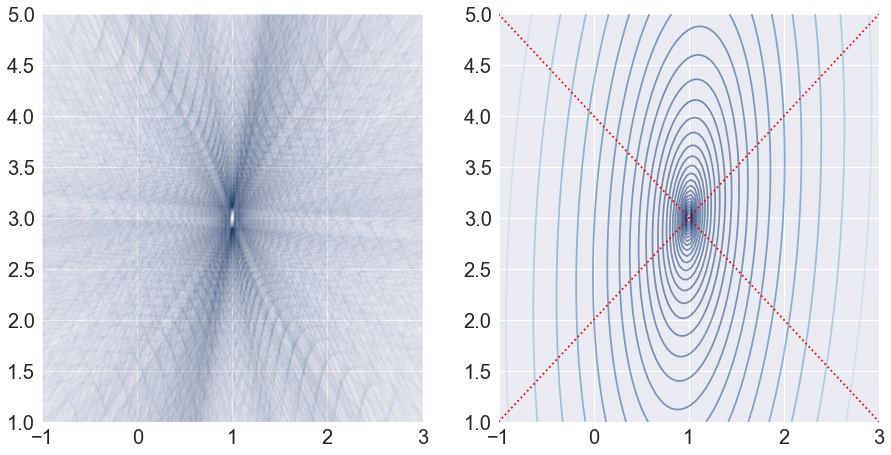

In [102]:
##### Start Your Code(Dataset Preparation) #####
mu, std = 0, 3
n_sample = 50

x_data = np.random.normal(mu, std, n_sample)
y_data = x_data + 3
##### End Your Code(Dataset Preparation) #####

fig, axes = plt.subplots(1, 2, figsize = (15,7.5))
##### Start Your Code(get_contours Function) #####
get_contours(x_data, y_data, axes, 0.01, 0.5)
##### End Your Code(get_contours Function) #####

***
**Programming**  
다음 조건의 normal distribution에 대해 cost function을 시각화하세요.  
그리고 cost function의 결과가 나오는 이유를 분석하세요.
- n_sample = 50
- mean = 0
- std = 0.2
- alpha_loss = 0.01
- alpha_cost = 0.5

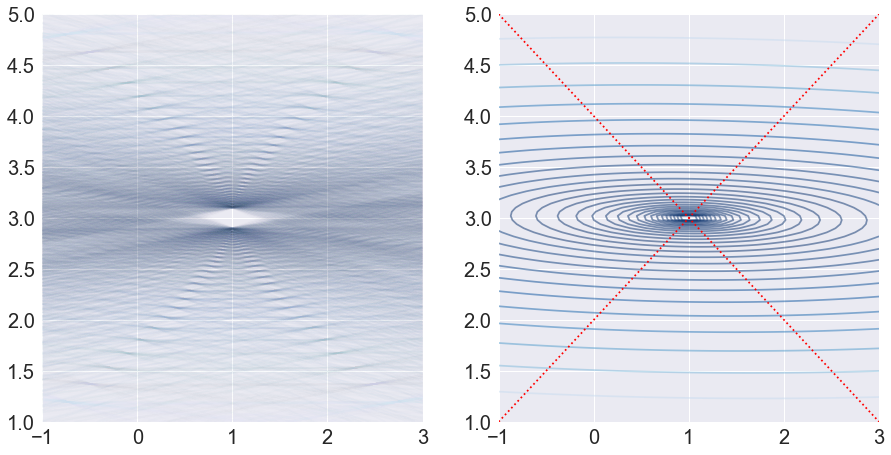

In [103]:
##### Start Your Code(Dataset Preparation) #####
mu, std = 0, 0.2
n_sample = 50

x_data = np.random.normal(mu, std, n_sample)
y_data = x_data + 3
##### End Your Code(Dataset Preparation) #####

fig, axes = plt.subplots(1, 2, figsize = (15,7.5))
##### Start Your Code(get_contours Function) #####
get_contours(x_data, y_data, axes, 0.01, 0.5)
##### End Your Code(get_contours Function) #####

***
**Programming**  
다음 조건의 normal distribution에 대해 cost function을 시각화하세요.  
그리고 cost function의 결과가 나오는 이유를 분석하세요.
- n_sample = 50
- mean = 3
- std = 1
- alpha_loss = 0.01
- alpha_cost = 0.5

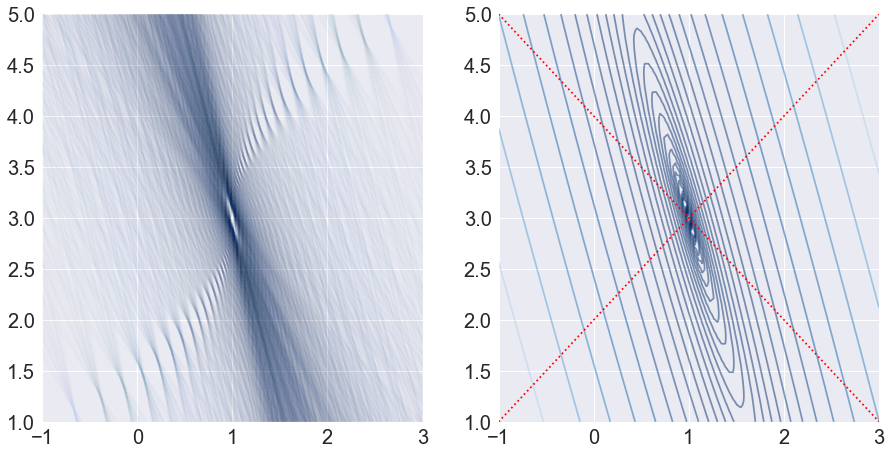

In [105]:
##### Start Your Code(Dataset Preparation) #####
mu, std = 3, 1
n_sample = 50

x_data = np.random.normal(mu, std, n_sample)
y_data = x_data + 3
##### End Your Code(Dataset Preparation) #####

fig, axes = plt.subplots(1, 2, figsize = (15,7.5))
##### Start Your Code(get_contours Function) #####
get_contours(x_data, y_data, axes, 0.01, 0.5)
##### End Your Code(get_contours Function) #####

***
**Programming**  
다음 조건의 normal distribution에 대해 cost function을 시각화하세요.  
그리고 cost function의 결과가 나오는 이유를 분석하세요.
- n_sample = 50
- mean = -3
- std = 1
- alpha_loss = 0.01
- alpha_cost = 0.5

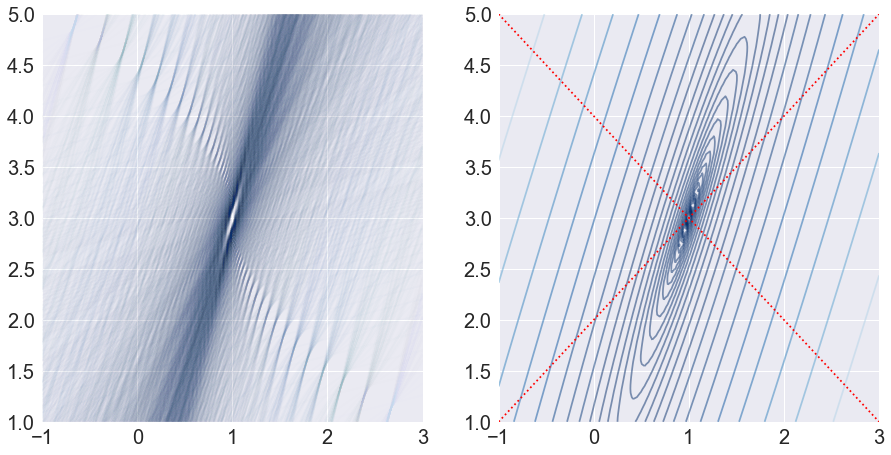

In [106]:
##### Start Your Code(Dataset Preparation) #####
mu, std = -3, 1
n_sample = 50

x_data = np.random.normal(mu, std, n_sample)
y_data = x_data + 3
##### End Your Code(Dataset Preparation) #####

fig, axes = plt.subplots(1, 2, figsize = (15,7.5))
##### Start Your Code(get_contours Function) #####
get_contours(x_data, y_data, axes, 0.01, 0.5)
##### End Your Code(get_contours Function) #####